In [1]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/self-driving-cars/labels_train.csv')
df = shuffle(df)
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
11082,1478021033223296820.jpg,373,434,132,157,1
100575,1479503210795369884.jpg,1,26,149,170,1
85862,1479501925206076540.jpg,412,449,135,148,1
48320,1478897795011601907.jpg,40,125,149,197,1
104099,1479503785331219550.jpg,318,346,132,156,1


In [3]:
from sklearn.model_selection import train_test_split

# Split gambar menjadi train/test secara acak, dengan seed tetap
train_images, test_images = train_test_split(df, test_size=0.2, random_state=42)

train_images.head()

,frame,xmin,xmax,ymin,ymax,class_id
106081,1479504028847306272.jpg,287,336,110,160,2
6116,1478020482204952462.jpg,131,176,140,172,1
94394,1479502654257499994.jpg,190,209,136,153,1
82762,1479501483155883952.jpg,130,169,143,174,2
124438,1479505513447503469.jpg,367,439,131,175,1


In [4]:
classes = df.class_id.unique()
print(classes)

[1 5 3 2 4]


In [5]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

In [6]:
boxes = {}
images = {}

base_path = '../input/self-driving-cars/images/'

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[0]
    
    images[class_id] = cv2.imread(base_path + first_row['frame'])
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

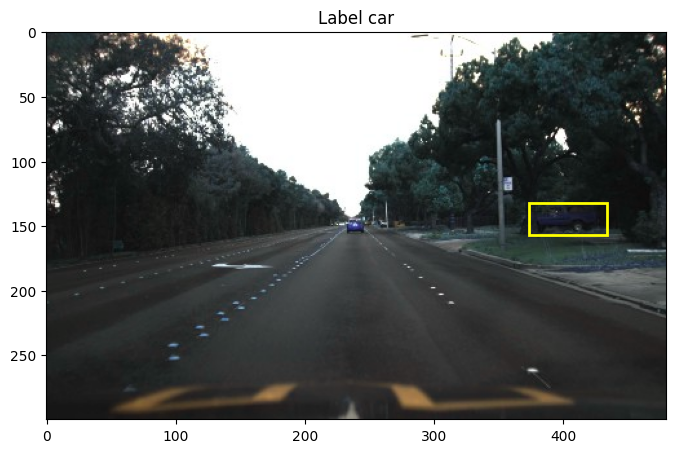

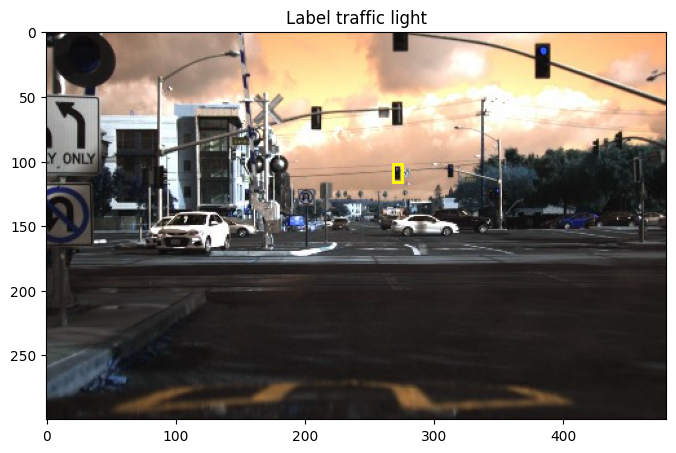

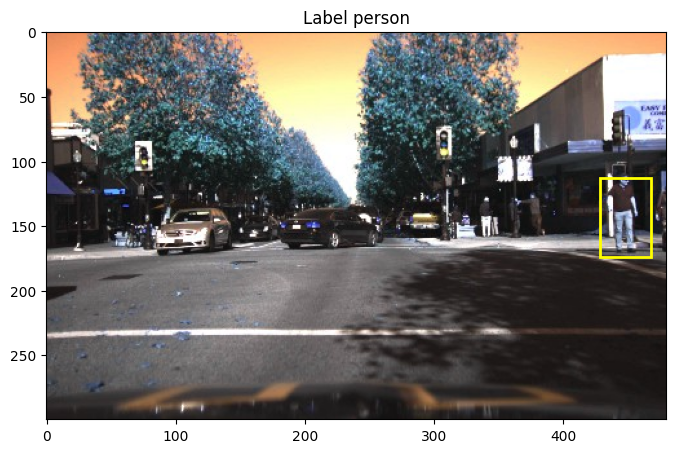

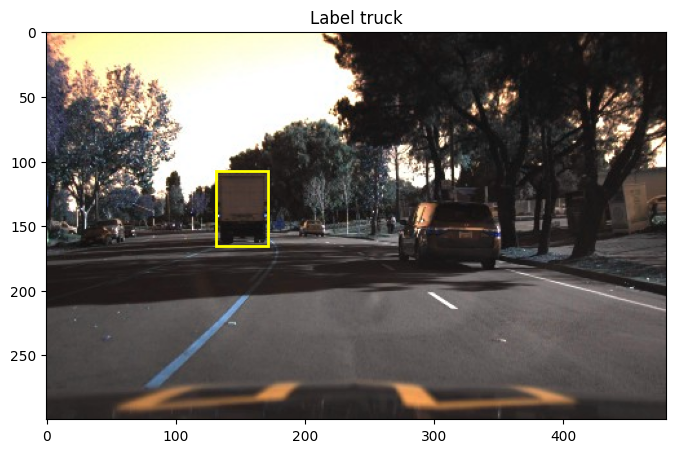

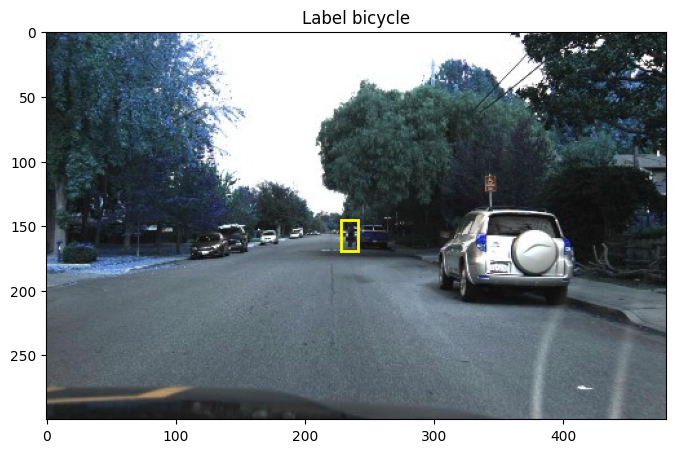

In [7]:
for i in classes:

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(8, 10))
    plt.title("Label " + labels[i])
    plt.imshow(images[i])
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))
    
    plt.show()

In [8]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.9.90
    Uninstalling nvidia-curand-cu12-10.3.9

In [9]:
from ultralytics import YOLO
import PIL 
from PIL import Image
from IPython.display import display
import os 
import pathlib 

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [10]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 299MB/s]


In [11]:
results=model.predict(source="/kaggle/input/self-driving-cars/images/1478019956680248165.jpg",
              save=True, conf=0.2,iou=0.5)


image 1/1 /kaggle/input/self-driving-cars/images/1478019956680248165.jpg: 416x640 1 car, 1 truck, 58.7ms
Speed: 9.8ms preprocess, 58.7ms inference, 287.8ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


In [12]:
result = results[0]
box = result.boxes[0]

In [13]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs 

In [14]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [124.69143676757812, 142.68826293945312, 148.7809295654297, 162.10049438476562]
Probability: 0.7161703705787659


In [15]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [125, 143, 149, 162]
Probability: 0.72
---
Object type: truck
Coordinates: [141, 139, 157, 154]
Probability: 0.31
---


In [16]:
results1 = model.predict(source="/kaggle/input/self-driving-cars/images/1478019954685370994.jpg",
              save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 /kaggle/input/self-driving-cars/images/1478019954685370994.jpg: 416x640 4 cars, 1 truck, 27.0ms
Speed: 3.2ms preprocess, 27.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


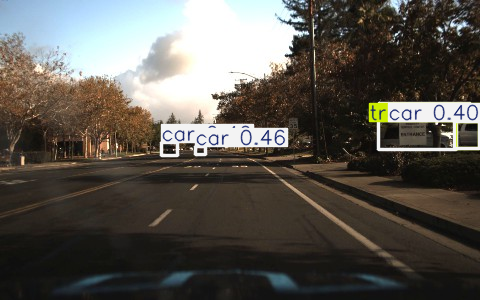

In [17]:
# Plotting results
plot = results1[0].plot()

plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))